# This Kernel Explores Beer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
beer_df = pd.read_csv("beer_data_set.csv")

In [3]:
beer_df.columns

Index(['Name', 'key', 'Style', 'Style Key', 'Brewery', 'Description', 'ABV',
       'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
       'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices',
       'Malty'],
      dtype='object')

In [4]:
num_style = len(beer_df.groupby('Style'))
num_brewery = len(beer_df.groupby('Brewery'))
print(f"This dataset contains {len(beer_df)} beers, {num_brewery} breweries, and {num_style} styles of beer")

This dataset contains 5558 beers, 1498 breweries, and 112 styles of beer


count    5558.000000
mean        3.760239
std         0.442951
min         1.270000
25%         3.590000
50%         3.820000
75%         4.040000
max         4.830000
Name: Ave Rating, dtype: float64

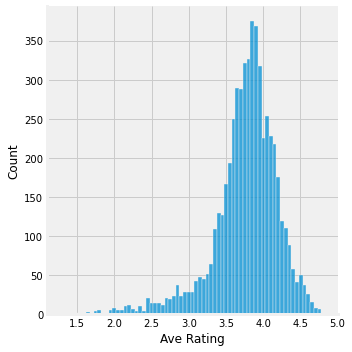

In [5]:
sns.displot(beer_df["Ave Rating"])
beer_df["Ave Rating"].describe()

In [7]:
drop_cols = ['key', 'Style Key', 'Description', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
       'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']
sorted_rating_df = beer_df.sort_values("Ave Rating", ascending=False).drop(columns=drop_cols)
pd.set_option('display.max_colwidth', 30)
with pd.option_context('expand_frame_repr', False):
    print("Top ten beers")
    print(sorted_rating_df[0:10],'\n')
    print("Worst ten beers")
    print(sorted_rating_df[-10:])

Top ten beers
                               Name                          Style                        Brewery    ABV  Ave Rating
499                         eisbock                 Bock - Eisbock          Kulmbacher Kommunbräu   9.20        4.83
4779            Marshmallow Handjee       Stout - Russian Imperial           3 Floyds Brewing Co.  15.00        4.81
1750                   Heady Topper              IPA - New England                  The Alchemist   8.00        4.76
1777                    King Julius              IPA - New England     Tree House Brewing Company   8.30        4.76
2919               Zenne Y Frontera           Lambic - Traditional          Brouwerij 3 Fonteinen   7.00        4.75
1793                      Very Hazy              IPA - New England     Tree House Brewing Company   8.60        4.75
1727              Pliny The Younger                 IPA - Imperial  Russian River Brewing Company  10.25        4.75
284                     Drone Witch  Bière de Cham

I have tried exactly 1 (Pliny) of the top 10 beers and 5 of the lowest 10. Really not a good look... I need to check this Tree House place out! There is clearly some correlation between ABV and rating

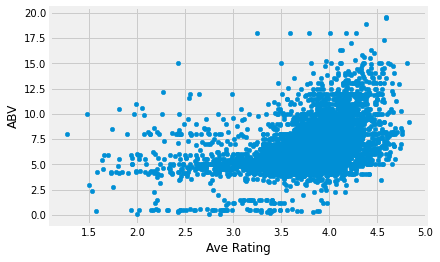

In [8]:
ABV_filter_df = beer_df[(beer_df["ABV"] !=0) & (beer_df["ABV"] < 20)]
ABV_filter_df.plot.scatter("Ave Rating", "ABV")

<p>
The key to not sucking is to have a high ABV beer, though it does not guarantee a clamoringly successful beer.
</p>
Side note, I have no idea what this "rating" is even based on, so take this all with a grain of salt.

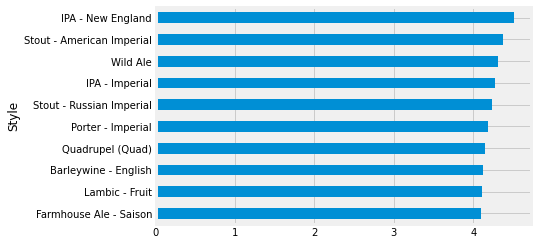

In [9]:
style_beer_best = beer_df.groupby(by='Style')["Ave Rating"].mean().sort_values(ascending=True)[-10:]
style_beer_best.plot.barh()

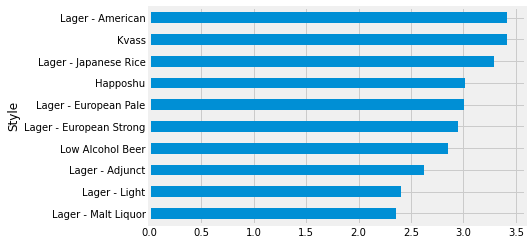

In [10]:
style_beer_worst = beer_df.groupby(by='Style')["Ave Rating"].mean().sort_values()[0:10]
style_beer_worst.plot.barh()

I am not surprised high ABV Imperials and IPAs make the top of the list, but Barleywine and Lambic - Fruit are unexpected. Malt liquor is the worst? Shocked! 

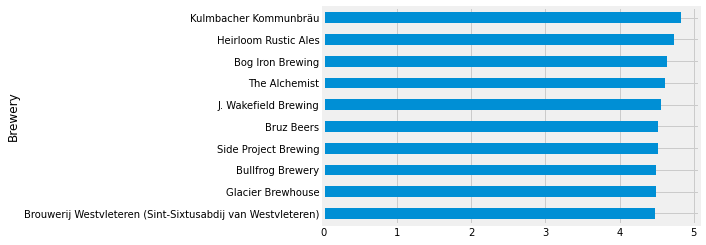

In [12]:
best_brewery = beer_df.groupby(by='Brewery')["Ave Rating"].mean().sort_values(ascending=True)[-10:]
best_brewery.plot.barh()

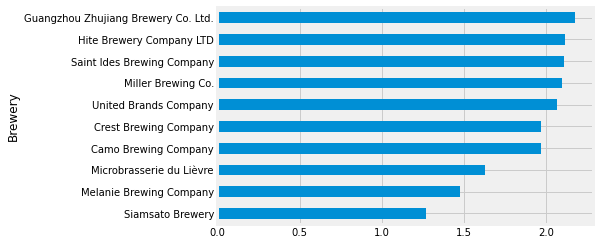

In [13]:
worst_brewery = beer_df.groupby(by='Brewery')["Ave Rating"].mean().sort_values()[0:10]
worst_brewery.plot.barh()

Would love to try some of the beers at the top breweries! Kulmbacher Kmmunbrau is kind of in the middle of nowhere in Germany, but maybe it's worth the pilgrimage. Heirloom Rustic Ales (a bit redundant of a name...) is in Tulsa, OK. Bog Iron & The Alchemist are both in New England 